## Plotting a line using initial data

In [25]:
# import csv

# print(z)

# row = []
# with open('D:\pro_dev\BaseballPitchVisual\Assets\data.csv', 'w') as f:
#     # using csv.writer method from CSV package
#     write = csv.writer(f)

#     for i in range(len(x)):
#         row = [z[i]-8,y[i]+1,x[i]-8]
#         write.writerow(row)

In [11]:
t0, tf = 0, 1 # Time in seconds
time = np.linspace(t0,tf,50)

# m, m/s, m/s^2
x0=0
xv0=30
xa=-.3
y0=1.5
yv0=8
ya=-9.8

x = []
y = []

# adding points in a line using kinematic equasion
for t in time:
    x.append(x0 + xv0*t + xa*np.power(t,2))
    y.append(y0 + yv0*t + ya*np.power(t,2))

Text(0, 0.5, 'Height (m)')

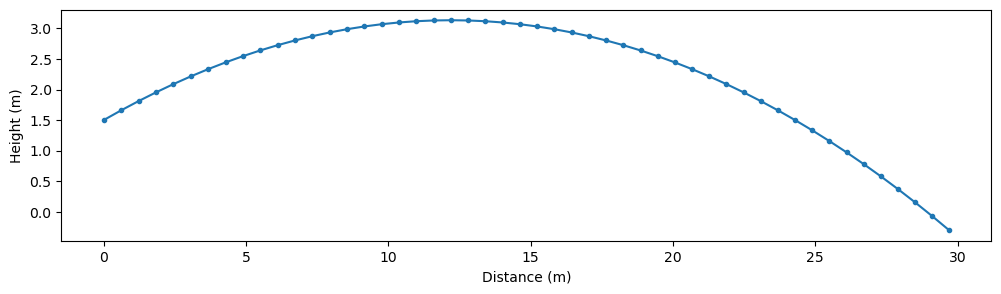

In [12]:
# y over x
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(x,y,".-")
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Height (m)")

## Using Runga Kutta 4th

In [15]:
def rk4(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,v0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    vpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, vpoints

In [16]:
# grav
def f(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81 
    return np.array([fy, fv], float)

In [17]:
# simple velocity
def x_straight(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = 0
    return np.array([fy, fv], float)

In [18]:
# velocity + force of drag
def x_lin(r,t):
    c = 0.3
    y = r[0]
    v = r[1]
    fy = v
    fv = -c*v
    return np.array([fy, fv], float)

# velocity + force of drag + force of gravity
def y_lin(r,t):
    c = 0.3
    g = -9.81
    y = r[0]
    v = r[1]
    fy = v
    fv = g-c*v
    return np.array([fy, fv], float)

# velocity + force of drag
def z_lin(r,t):
    c = 0.3
    y = r[0]
    v = r[1]
    fy = v
    fv = -c*v
    return np.array([fy, fv], float)

0.0 -0.11819405806549665 21.770557727137003


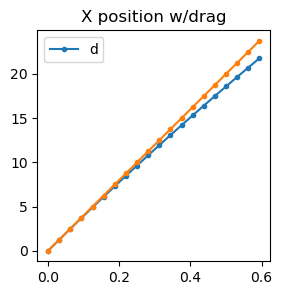

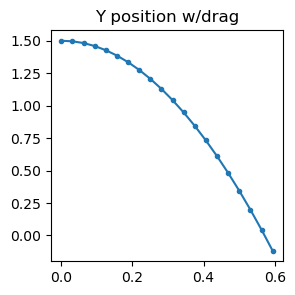

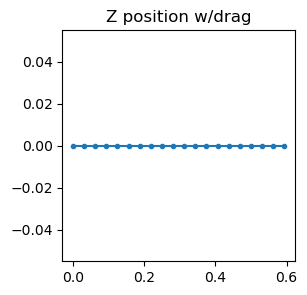

In [92]:
t,z,zv = rk4(x_lin, x0=0, v0=40, tf=.6)
st,sz,sxz = rk4(x_straight, x0=0, v0=40, tf=.6)
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.plot(t,z,".-")
ax1.plot(t,sz,".-")
ax1.legend("d")
ax1.set_title("X position w/drag")


t,y,yv = rk4(y_lin, x0=1.5, tf=.6)
fig0, ax0 = plt.subplots(figsize=(3,3))
ax0.plot(t,y,".-")
ax0.set_title("Y position w/drag")

t,x,xv = rk4(z_lin, v0=0, tf=.6)
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(t,x,".-")
ax.set_title("Z position w/drag")

print(x[-1], y[-1], z[-1])

Text(0, 0.5, 'Height (M)')

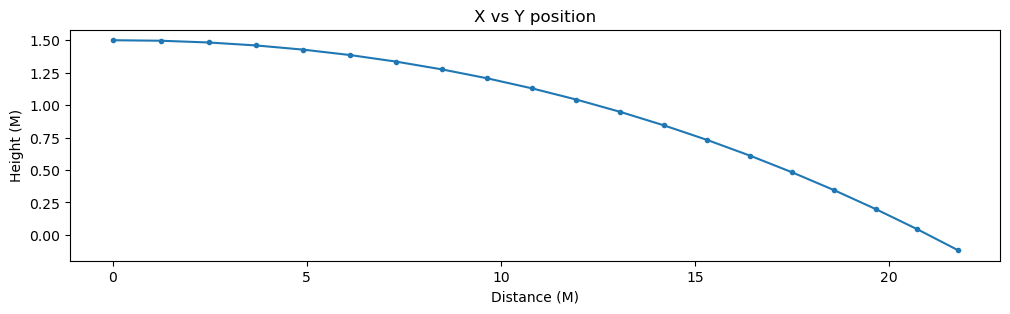

In [20]:
# y over x
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(z,y,".-")
ax2.set_title("X vs Y position")
ax2.set_xlabel("Distance (M)")
ax2.set_ylabel("Height (M)")

Text(0.5, 0, 'Z-axis')

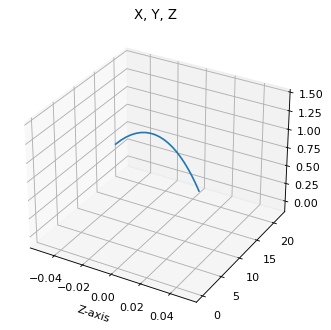

In [17]:
fig3 = plt.figure(dpi=80)
ax3 = fig3.add_subplot(projection='3d')
ax3.plot(0*t,z,y)
ax3.set_title("X, Y, Z")
ax3.set_xlabel('Z-axis')

# Introducing spin w/ Magnus Effect

Accodring to [Wikipedia](https://en.wikipedia.org/wiki/Magnus_effect), the correct equasion for force is:

$ F_a = \Delta p * A = c_a * \frac{\varrho}{2} (u^2_1 - u^2_2) * A $

where:
- $c_a$ is a scalar dependent on the shape and material of the rotating object
- $u$ is the speed of the fluid relative to each surface
- $\varrho$ is the fluid density
- $A$ cross-section area

what this means(2D):
- $c_a$ arbitraty constant(?): grip coefficient
- $u_1$ speed of baseball surface: 40 m/s
- $u_2$ speed of air - windspeed(?): 0 m/s
- $\varrho$ density of air: 1.293 kg*m^3
- $A$ Cross-section area of ball: 2.9in = 0.07366m (Avg) * $\pi$

X velocity start: 40.0 end: 35.68057517023477


Text(0.5, 1.0, 'X vs time')

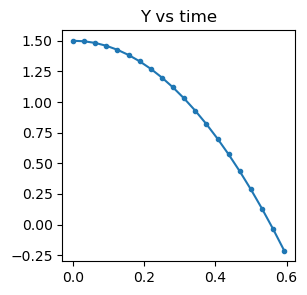

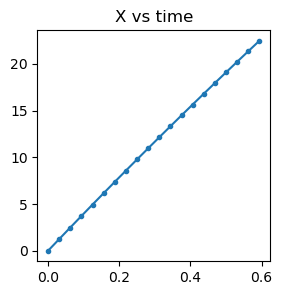

In [75]:
grip = 1
rpm_z = 2800 # assumed constant, range: 1000-2800
airV_x = 0
airV_y = 0
airRho = 1.293
radius = 0.03683

# Magnus effect only, no drag

def x_mag(r,t):
    c = 0
    c_a = grip
    A = radius * 2 * np.pi
    y = r[0]
    v = r[1]
    rpm = rpm_z
    omega = np.pi*2*(rpm/60) # angular velocity
    # print("Omega:", omega)
    u1 = omega*radius # linear velocity
    # print("Linear V:", u1)
    u2 = -v
    
    fy = v
    fv = -c*v - c_a*(airRho/2)*(u1-u2)*A
    
    # print("V:", v)
    
    return np.array([fy, fv], float)

def y_mag(r,t):
    c = 0
    g = -9.81
    y = r[0]
    v = r[1]
    fy = v
    fv = g-c*v
    return np.array([fy, fv], float)

t,y,yv = rk4(y_mag, x0=1.5, tf=.6)
fig0, ax0 = plt.subplots(figsize=(3,3))
ax0.plot(t,y,".-")
ax0.set_title("Y vs time")

t,x,xv = rk4(x_mag, v0=40, tf=.6)
print("X velocity start:", xv[0], "end:", xv[-1])
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(t,x,".-")
ax.set_title("X vs time")

Text(0, 0.5, 'Height (M)')

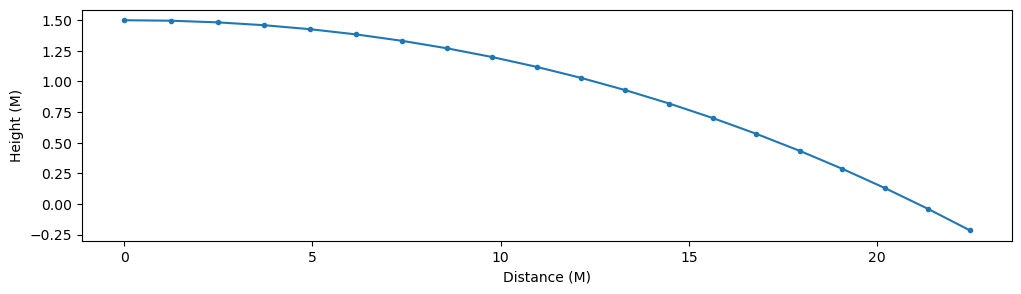

In [73]:
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(x,y,".-")
ax2.set_xlabel("Distance (M)")
ax2.set_ylabel("Height (M)")

## Alt Mag force

From [engineer's edge](https://www.engineersedge.com/calculators/magnus_effect_calculator_15766.htm)

$F_M = \frac{1}{2} * C_L * \rho * A * v^2$

Where 
$ A = \pi * R^2 $

And
$ S = R * \omega / v $


X velocity start: 40.0 end: 39.29955034287025


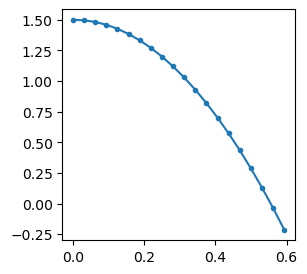

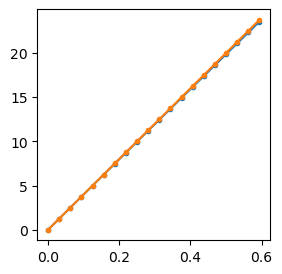

In [101]:
# grip = 1
rpm_z = 2800 # assumed constant, range: 1000-2800
airV_x = 0
airV_y = 0
airRho = 1.293
radius = 0.03683

def x_mag(r,t):
    c = 0
    c_a = grip
    A = radius**2 * np.pi
    y = r[0]
    v = r[1]
    rpm = rpm_z
    omega = np.pi*2*(rpm/60) # angular velocity
    
    S = radius * omega / v # slip factor
    # print(S)
    C_L = S # VERY roughly equivelent, needs a lookup table
    
    fy = v
    fv = -c*v - 0.5*C_L*airRho*A*v**2
    
    # print("V:", v)
    
    return np.array([fy, fv], float)

def y_mag(r,t):
    c = 0
    g = -9.81
    y = r[0]
    v = r[1]
    fy = v
    fv = g-c*v
    return np.array([fy, fv], float)

t,y,yv = rk4(y_mag, x0=1.5, tf=.6)
fig0, ax0 = plt.subplots(figsize=(3,3))
ax0.plot(t,y,".-")

t,x,xv = rk4(x_mag, v0=40, tf=.6)
print("X velocity start:", xv[0], "end:", xv[-1])
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(t,x,".-")
ax.plot(t,t*40,".-")

The magnus force is supposed to be applied perpendicular to the ball: so the velocity of x effects force on y, and the velocity of y effects force on x. So I need to redo the RK4 to account for both dementions at once. At least this currently gives some visual